<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2

### Problem Statement

Home ownership has been on the rise which led to a boom in the property market all around the world. As such, it would bring great value for home buyer as well as home seller to have a good gauge of the price without having to sell too low or buy too high from market rate of houses with similar features. 

MyHome is an online property listing platform that connects home sellers with potential buyers. The website also provides data-driven recommendations on price trends based on details of the listings to help users optimise their bid/sell prices. 

As analysts with MyHome, the aim of this study is to:

1) Create a regression model to predict home sale prices based on the listing details 

2) Recommend the top 4 features that can fetch higher sale prices for residential properties

## Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning) 
- [Feature Engineering](#Feature-Engineering)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Export to csv](#Export-to-csv)

## Background

As the housing market prices in USA are expected to rise, it is imperative for home buyers and sellers to have a good idea of where the prices of houses are heading to.([*Source*](https://www.reuters.com/business/us-house-prices-rise-another-10-this-year-2022-03-02/#:~:text=Prices%20are%20forecast%20to%20rise,on%20the%20Case%2FShiller%20index))

We could also see what are the added features that could influence the property price as well as items that would not add any benefit to making the property more attractive. ([*Source*](https://www.ceicdata.com/en/indicator/united-states/house-prices-growth))

## Dataset Selected

* [`train.csv`](../datasets/train.csv): Housing Market Data for Ames, Iowa


## Codes

In [655]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from math import sqrt

In [656]:
#Setting default display settings
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 60)

## Data Import and Cleaning

In [657]:
#Reading train.csv Files
housing_data = pd.read_csv('../datasets/train.csv' )
housing_data.head()


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,...,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,...,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,...,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,...,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,...,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,...,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [658]:
#Reading test.csv Files
testHousing_data = pd.read_csv('../datasets/test.csv' )
testHousing_data.head()


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,...,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,...,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,...,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,...,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,...,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,...,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


I have create two variables that reads two different data types. The train dataset is used to built regression model that helps me in deciding which regression model that is suitable with high R^2 and low RMSE. As i will be using the test.csv data to do predictions, i have also included together as the data cleaning is similar to the train dataset. 
housing_data = train.csv
testHousing_data = test.csv

In [659]:
#Checking for null values for housing_data (train) before imputation
housing_data.isnull().sum().sort_values(ascending=False).head(22)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
dtype: int64

In [660]:
#Checking for null values for test data before imputation
testHousing_data.isnull().sum().sort_values(ascending=False).head(22)


Pool QC           874
Misc Feature      837
Alley             820
Fence             706
Fireplace Qu      422
Lot Frontage      160
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Garage Type        44
BsmtFin Type 1     25
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 2     25
Electrical          1
Mas Vnr Type        1
Mas Vnr Area        1
Kitchen AbvGr       0
TotRms AbvGrd       0
Bedroom AbvGr       0
dtype: int64

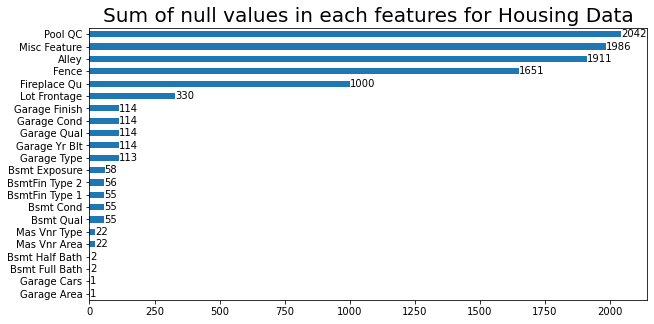

In [661]:
housing_data_null = housing_data.isnull().sum().sort_values(ascending=True).tail(22)
housing_data_null.plot(kind='barh', figsize=(10,5))
for y, x in enumerate(housing_data_null):
    plt.annotate(str(x), xy=(x, y), va='center')
plt.title('Sum of null values in each features for Housing Data',size=20)
plt.show()

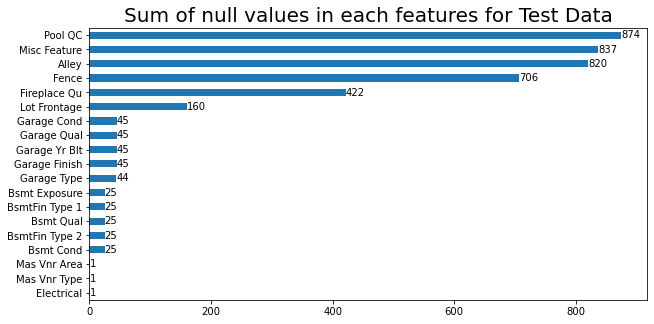

In [662]:
test_data_null = testHousing_data.isnull().sum().sort_values(ascending=True).tail(19)
test_data_null.plot(kind='barh', figsize=(10,5))
for y, x in enumerate(test_data_null):
    plt.annotate(str(x), xy=(x, y), va='center')
plt.title('Sum of null values in each features for Test Data',size=20)
plt.show()

**Summary**

From the data imported, there were a few findings:
1. There were a total of 22 features in the train dataset that contains null values. Feature with the most null value are as follows:
    - Pool QC has all its values are null. (100% of the data)
    - Misc Feature had most of its values null (97.25% of the data) 
    - Alley has most of its value null as most houses does not have an alley (93.58% of the data) 
    - Fence has most of value null as it does not have a fireplace (80.85% of the data)
    - Fireplace Qu has slightly less than half of its value null as the houses does not have a fireplace (48.9% of the data)
    
2. There were a total of 19 features in the test dataset that contains null values. Features with the most null values are as follows: 
    - Pool QC has all of its values null. (100% of the data) 
    - Misc Feature had most of its values null (95.76% of the data) 
    - Alley has most of its value null as most houses does not have an alley (93.82% of the data) 
    - Fence has most of value null as it does not have a fireplace (80.77% of the data)
    - Fireplace Qu has slightly less than half of its value null as the houses does not have a fireplace (48.28% of the data)


## Imputation of null values

In [663]:
#Data without amenities are filled with nan, so will replace it with string value
housing_data['Pool QC'] = housing_data['Pool QC'].fillna('No pool')

housing_data['Misc Feature'] = housing_data['Misc Feature'].fillna('No Misc Feature')

housing_data['Alley'] = housing_data['Alley'].fillna('No Alley')

housing_data['Fence'] = housing_data['Fence'].fillna('No Fence')

housing_data['Fireplace Qu'] = housing_data['Fireplace Qu'].fillna('None')


In [664]:
#Imputation 
#Data without amenities are filled with nan, so will replace it with string value
testHousing_data['Pool QC'] = testHousing_data['Pool QC'].fillna('No pool')

testHousing_data['Misc Feature'] = testHousing_data['Misc Feature'].fillna('No Misc Feature')

testHousing_data['Alley'] = testHousing_data['Alley'].fillna('No Alley')

testHousing_data['Fence'] = testHousing_data['Fence'].fillna('No Fence')

testHousing_data['Fireplace Qu'] = testHousing_data['Fireplace Qu'].fillna('None')

**Observation** 

For imputating the null values, as all the null values in Pool QC, Misc Features, Alley, Fence and fireplace qu features does not have the features in the house. Thus i've replaced the empty values with indication that the feature does not exist in the house. This would give the audience a better perspective instead of simply deleting or leaving the cell empty. 


In [665]:
#Determining the Lot Frontage missing value 
print(housing_data['Lot Frontage'].mean())
print(housing_data['Lot Frontage'].median())

#Since both Average(69) and Median(68) is relatively closer than mode (60). I will be using the median as its the lower of the two similar values
housing_data['Lot Frontage'] = housing_data['Lot Frontage'].fillna(68)

69.05520046484602
68.0


In [666]:
#Determining the Lot Frontage missing value 
print(testHousing_data['Lot Frontage'].mean())
print(testHousing_data['Lot Frontage'].median())

#Since both Average(69) and Median(68) is relatively closer than mode (60)
testHousing_data['Lot Frontage'] = testHousing_data['Lot Frontage'].fillna(68)



69.54596100278552
68.0


As the lot frontage missing value is relatively small (7%), i've decided to calculate the aggregate scores of its columns. As mean and median are relatively close as compared to mode (60), i've decided to use the lower of the two variable. 

In [667]:
#Apartments that doesn't have garage appeared to have null values
housing_data['Garage Cond'] = housing_data['Garage Cond'].fillna('None')
housing_data['Garage Yr Blt'] = housing_data['Garage Yr Blt'].fillna(0)
housing_data['Garage Finish'] = housing_data['Garage Finish'].fillna('None')
housing_data['Garage Qual'] = housing_data['Garage Qual'].fillna('None')
housing_data['Garage Type'] = housing_data['Garage Type'].fillna('None')
housing_data['Garage Cars'] = housing_data['Garage Cars'].fillna(0)
housing_data['Garage Area'] = housing_data['Garage Area'].fillna(0)


In [668]:
#Apartments that doesn't have garage appeared to have null values
testHousing_data['Garage Cond'] = testHousing_data['Garage Cond'].fillna('None')
testHousing_data['Garage Yr Blt'] = testHousing_data['Garage Yr Blt'].fillna(0)
testHousing_data['Garage Finish'] = testHousing_data['Garage Finish'].fillna('None')
testHousing_data['Garage Qual'] = testHousing_data['Garage Qual'].fillna('None')
testHousing_data['Garage Type'] = testHousing_data['Garage Type'].fillna('None')
testHousing_data['Garage Cars'] = testHousing_data['Garage Cars'].fillna(0)
testHousing_data['Garage Area'] = testHousing_data['Garage Area'].fillna(0)

As most of the garage features have an indication of 0 in the garage area, i've imputed all the relevant features as 0 or none as the property has no garage. 

In [669]:
#Apartment without Basement appeared to have null values. (Basement Square feet is 0)
housing_data['Bsmt Exposure'] = housing_data['Bsmt Exposure'].fillna('None')
housing_data['BsmtFin Type 2'] = housing_data['BsmtFin Type 2'].fillna('None')
housing_data['Bsmt Qual'] = housing_data['Bsmt Qual'].fillna('None')
housing_data['Bsmt Cond'] = housing_data['Bsmt Cond'].fillna('None')
housing_data['BsmtFin Type 1'] = housing_data['BsmtFin Type 1'].fillna('None')
housing_data['Bsmt Full Bath'] = housing_data['Bsmt Full Bath'].fillna(0)
housing_data['Bsmt Half Bath'] = housing_data['Bsmt Half Bath'].fillna(0)
housing_data['Total Bsmt SF'] = housing_data['Total Bsmt SF'].fillna(0)
housing_data['Bsmt Unf SF'] = housing_data['Bsmt Unf SF'].fillna(0)
housing_data['BsmtFin SF 1'] = housing_data['BsmtFin SF 1'].fillna(0)
housing_data['BsmtFin SF 2'] = housing_data['BsmtFin SF 2'].fillna(0)

In [670]:
#Apartment without Basement appeared to have null values. (Basement Square feet is 0)
testHousing_data['Bsmt Exposure'] = testHousing_data['Bsmt Exposure'].fillna('None')
testHousing_data['BsmtFin Type 2'] = testHousing_data['BsmtFin Type 2'].fillna('None')
testHousing_data['Bsmt Qual'] = testHousing_data['Bsmt Qual'].fillna('None')
testHousing_data['Bsmt Cond'] = testHousing_data['Bsmt Cond'].fillna('None')
testHousing_data['BsmtFin Type 1'] = testHousing_data['BsmtFin Type 1'].fillna('None')
testHousing_data['Bsmt Full Bath'] = testHousing_data['Bsmt Full Bath'].fillna(0)
testHousing_data['Bsmt Half Bath'] = testHousing_data['Bsmt Half Bath'].fillna(0)
testHousing_data['Total Bsmt SF'] = testHousing_data['Total Bsmt SF'].fillna(0)
testHousing_data['Bsmt Unf SF'] = testHousing_data['Bsmt Unf SF'].fillna(0)
testHousing_data['BsmtFin SF 1'] = testHousing_data['BsmtFin SF 1'].fillna(0)
testHousing_data['BsmtFin SF 2'] = testHousing_data['BsmtFin SF 2'].fillna(0)

As the missing values in the respective basement has a basement square feet of 0, i've assigned all the missing values in each feature as none or 0 as there is no basement for the property. 

In [671]:
#Masonry veneer type that are null also have null Masonry area in square feet
housing_data['Mas Vnr Type'] = housing_data['Mas Vnr Type'].fillna('None')
housing_data['Mas Vnr Area'] = housing_data['Mas Vnr Area'].fillna(0)

In [672]:
#Masonry veneer type that are null also have null Masonry area in square feet
testHousing_data['Mas Vnr Type'] = testHousing_data['Mas Vnr Type'].fillna('None')
testHousing_data['Mas Vnr Area'] = testHousing_data['Mas Vnr Area'].fillna(0)


As the missing values in MAS vnr type/area have 0 or none values, i've amended the respective columns as 0 or none. 

In [673]:
#Converting features from float to integer 
housing_data['Garage Yr Blt'] = housing_data['Garage Yr Blt'].astype(float)
housing_data['Garage Yr Blt'].dtypes


dtype('float64')

In [674]:
#Converting features from float to integer 
testHousing_data['Garage Yr Blt'] = testHousing_data['Garage Yr Blt'].astype(float)
testHousing_data['Garage Yr Blt'].dtypes

dtype('float64')

In [675]:
testHousing_data['Electrical'].value_counts()

SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [676]:
#Imputing testHousing_data missing value with FuseP as FuseP count is the lowest.
testHousing_data['Electrical'] = testHousing_data['Electrical'].fillna('FuseP')
testHousing_data['Kitchen Qual'] = testHousing_data['Kitchen Qual'].fillna(0)

As there is two more features in the testHousing_data that requires additional cleaning, i've allocated the imputation according to the lowest score as i believe the missing value is very low (1) and will not skew the overall result. 

In [677]:
#Checking for null values after imputation
housing_data.isnull().sum().sort_values(ascending=False).head(11)

Id               0
Heating QC       0
Garage Type      0
Fireplace Qu     0
Fireplaces       0
Functional       0
TotRms AbvGrd    0
Kitchen Qual     0
Kitchen AbvGr    0
Bedroom AbvGr    0
Half Bath        0
dtype: int64

In [678]:
#Checking for null values after imputation
testHousing_data.isnull().sum().sort_values(ascending=False).head(11)

Id               0
PID              0
Fireplace Qu     0
Fireplaces       0
Functional       0
TotRms AbvGrd    0
Kitchen Qual     0
Kitchen AbvGr    0
Bedroom AbvGr    0
Half Bath        0
Full Bath        0
dtype: int64

In [679]:
#Renaming the columns by replacing space with underscore and lowercase all columns
housing_data.columns = housing_data.columns.str.lower().str.replace(' ','_')
housing_data.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,...,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,68.0,13517,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,...,1,3,1,Gd,6,Typ,0,None,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,No pool,No Fence,No Misc Feature,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,...,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,No pool,No Fence,No Misc Feature,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,...,0,3,1,Gd,5,Typ,0,None,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,No pool,No Fence,No Misc Feature,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,...,1,3,1,TA,7,Typ,0,None,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,No pool,No Fence,No Misc Feature,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,...,0,3,1,TA,6,Typ,0,None,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,No pool,No Fence,No Misc Feature,0,3,2010,WD,138500


In [680]:
#Renaming the columns by replacing space with underscore and lowercase all columns
testHousing_data.columns = testHousing_data.columns.str.lower().str.replace(' ','_')
testHousing_data.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,...,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,...,2,0,4,2,Fa,9,Typ,0,None,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,No pool,No Fence,No Misc Feature,0,4,2006,WD
1,2718,905108090,90,RL,68.0,9662,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,...,2,0,6,2,TA,10,Typ,0,None,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,No pool,No Fence,No Misc Feature,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,...,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,No pool,No Fence,No Misc Feature,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,...,1,0,2,1,TA,5,Typ,0,None,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,No pool,No Fence,No Misc Feature,0,7,2007,WD
4,625,535105100,20,RL,68.0,9500,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,...,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,No pool,No Fence,No Misc Feature,0,7,2009,WD


Changing the columns name to lowercase and also replace the space inbetween with underscore. 

In [681]:
#Determining the different property type
housing_data['ms_zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

In [682]:
#Determining the different property type
testHousing_data['ms_zoning'].value_counts()

RL         674
RM         146
FV          38
RH          13
C (all)      6
I (all)      1
Name: ms_zoning, dtype: int64

In [683]:
#Deleting data with MS Zone that does are not residential 
housing_data = housing_data[(housing_data.ms_zoning != 'C (all)') &
                            (housing_data.ms_zoning != 'I (all)') &
                            (housing_data.ms_zoning != 'A (agr)')]


In [684]:
#Rows after deleting
print(housing_data.shape)
print(housing_data['ms_zoning'].shape)
housing_data['ms_zoning'].value_counts()

(2029, 81)
(2029,)


RL    1598
RM     316
FV     101
RH      14
Name: ms_zoning, dtype: int64

As my task is to focus on creating regression model to predict residential prices, i have decided to remove none essential properties such as commercial, industrial as well as agriculture as their values/features may lead to inaccruate prediction for residential price. 

## Feature Engineering

Added new features:
- Life span

In [685]:
#Feature engineering to see if adding total living area would lead to higher salesprice
total_area = housing_data['total_bsmt_sf'] + housing_data['1st_flr_sf'] + housing_data['2nd_flr_sf']
print(np.corrcoef(total_area, housing_data['saleprice']))


[[1.         0.78006573]
 [0.78006573 1.        ]]


In [686]:
#Feature engineering to see if house preserved over the years would lead to increase in price
modification2 = housing_data['yr_sold'] - housing_data['year_built']
print(np.corrcoef(modification2, housing_data['saleprice']))

[[ 1.         -0.56407338]
 [-0.56407338  1.        ]]


In [687]:
housing_data['lifespan'] = housing_data['yr_sold'] - housing_data['year_built'] 
housing_data.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,...,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,lifespan
0,109,533352170,60,RL,68.0,13517,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,...,3,1,Gd,6,Typ,0,None,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,No pool,No Fence,No Misc Feature,0,3,2010,WD,130500,34
1,544,531379050,60,RL,43.0,11492,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,...,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,No pool,No Fence,No Misc Feature,0,4,2009,WD,220000,13
2,153,535304180,20,RL,68.0,7922,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,...,3,1,Gd,5,Typ,0,None,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,No pool,No Fence,No Misc Feature,0,1,2010,WD,109000,57
3,318,916386060,60,RL,73.0,9802,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,...,3,1,TA,7,Typ,0,None,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,No pool,No Fence,No Misc Feature,0,4,2010,WD,174000,4
4,255,906425045,50,RL,82.0,14235,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,...,3,1,TA,6,Typ,0,None,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,No pool,No Fence,No Misc Feature,0,3,2010,WD,138500,110


In [688]:
testHousing_data['lifespan'] = testHousing_data['yr_sold'] - testHousing_data['year_built'] 
testHousing_data.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,...,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,lifespan
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,...,0,4,2,Fa,9,Typ,0,None,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,No pool,No Fence,No Misc Feature,0,4,2006,WD,96
1,2718,905108090,90,RL,68.0,9662,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,...,0,6,2,TA,10,Typ,0,None,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,No pool,No Fence,No Misc Feature,0,8,2006,WD,29
2,2414,528218130,60,RL,58.0,17104,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,...,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,No pool,No Fence,No Misc Feature,0,9,2006,New,0
3,1989,902207150,30,RM,60.0,8520,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,...,0,2,1,TA,5,Typ,0,None,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,No pool,No Fence,No Misc Feature,0,7,2007,WD,84
4,625,535105100,20,RL,68.0,9500,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,...,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,No pool,No Fence,No Misc Feature,0,7,2009,WD,46


I have also did feature engineering by creating a new columns called lifespan where I take Year sold - year built as I wanted to see if sale price would increase due to longer holding period. However the result turns out to have a negatively correlation between holding the total lifespan of the asset against the sale price. This indicates that the longer the asset is kept, the lower the sales price. I've also done other feature engineering such as total_area where I compute to see if larger living space would lead to higher sales price. Although the correlation is higher, however when computing the R2, my score is slightly lower than when i did not do the combination. Thus I decided not to include that into my calculation. 

## Exploratory Data Analysis

In [689]:
#Removing PID and MS subclass columns
housing_data.drop(['pid', 'ms_subclass'],axis = 1, inplace = True)
housing_data.head()

,id,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,...,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,lifespan
0,109,RL,68.0,13517,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,...,3,1,Gd,6,Typ,0,None,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,No pool,No Fence,No Misc Feature,0,3,2010,WD,130500,34
1,544,RL,43.0,11492,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,...,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,No pool,No Fence,No Misc Feature,0,4,2009,WD,220000,13
2,153,RL,68.0,7922,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,...,3,1,Gd,5,Typ,0,None,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,No pool,No Fence,No Misc Feature,0,1,2010,WD,109000,57
3,318,RL,73.0,9802,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,...,3,1,TA,7,Typ,0,None,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,No pool,No Fence,No Misc Feature,0,4,2010,WD,174000,4
4,255,RL,82.0,14235,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,...,3,1,TA,6,Typ,0,None,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,No pool,No Fence,No Misc Feature,0,3,2010,WD,138500,110


In [690]:
#Removing PID and MS subclass columns for Test dataset as well
testHousing_data.drop(['pid', 'ms_subclass'],axis = 1, inplace = True)
testHousing_data.head()

,id,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,...,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,lifespan
0,2658,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,...,0,4,2,Fa,9,Typ,0,None,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,No pool,No Fence,No Misc Feature,0,4,2006,WD,96
1,2718,RL,68.0,9662,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,...,0,6,2,TA,10,Typ,0,None,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,No pool,No Fence,No Misc Feature,0,8,2006,WD,29
2,2414,RL,58.0,17104,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,...,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,No pool,No Fence,No Misc Feature,0,9,2006,New,0
3,1989,RM,60.0,8520,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,...,0,2,1,TA,5,Typ,0,None,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,No pool,No Fence,No Misc Feature,0,7,2007,WD,84
4,625,RL,68.0,9500,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,...,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,No pool,No Fence,No Misc Feature,0,7,2009,WD,46


I've removed columns ID, PID and MS Subclass as they are unique individual ID which would not generate any meaningful result on correlation with sales price. Dropping such columns would help to prevent unnecessary columns be displayed in heatmap and correlation data that could mislead the audience. 

In [691]:
#Correlation with salesprice
housing_data.corr()['saleprice'].sort_values(ascending=False).head(30)


saleprice         1.000000
overall_qual      0.797463
gr_liv_area       0.694956
garage_area       0.648170
garage_cars       0.645071
total_bsmt_sf     0.624187
1st_flr_sf        0.616066
year_built        0.564011
year_remod/add    0.542437
full_bath         0.532112
mas_vnr_area      0.501607
totrms_abvgrd     0.501333
fireplaces        0.464721
bsmtfin_sf_1      0.419046
open_porch_sf     0.346546
lot_frontage      0.330741
wood_deck_sf      0.321643
lot_area          0.302164
half_bath         0.278284
bsmt_full_bath    0.277671
garage_yr_blt     0.249324
2nd_flr_sf        0.245870
bsmt_unf_sf       0.188447
screen_porch      0.131855
bedroom_abvgr     0.127942
3ssn_porch        0.049104
mo_sold           0.036998
pool_area         0.022420
bsmtfin_sf_2      0.012309
misc_val         -0.008716
Name: saleprice, dtype: float64

In [692]:
#Dropping Data with less than 40% correlation 
housing_data.drop(['open_porch_sf',
                   'wood_deck_sf',
                   'lot_frontage',
                   'lot_area',
                   'bsmt_full_bath',
                   'half_bath',
                   'garage_yr_blt',
                   '2nd_flr_sf',
                   'bsmt_unf_sf',
                   'bedroom_abvgr',
                   'screen_porch',
                   '3ssn_porch',
                   'mo_sold',
                   'pool_area',
                   'bsmtfin_sf_2',
                   'misc_val',
                   'yr_sold',
                   'kitchen_abvgr',
                   'enclosed_porch',
                   'low_qual_fin_sf',
                   'bsmt_half_bath',
                   'overall_cond'], axis =1, inplace =True)
#Deleted 22 columns


For the correlation section, I start off by determining the correlation between numeric data against Sales price and sort them accordingly to highest and lowest correlation. This allows me to instantaneously locate > 40% correlation data. As there are little strong correlationship between the features against salesprice, i've also decided to reduce my threshold of taking correlation of > 40% instead of > 50% to increase the number of variables to fit into the regression model. After determining what are the columns that meets my requirements(>40% corr with saleprice), I dropped all other non-essential columns that i do not need. This would help to ensure the data kept have a certain degree of affecting the property salesprice.

In [693]:
housing_data.corr()

,id,overall_qual,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,fireplaces,garage_cars,garage_area,saleprice,lifespan
id,1.000000,-0.056345,-0.065503,-0.090174,-0.034662,-0.046260,-0.034446,-0.022327,-0.023489,-0.058042,-0.011049,-0.035588,-0.043614,-0.041574,-0.050397,0.022684
overall_qual,-0.056345,1.000000,0.595604,0.576946,0.428954,0.271442,0.540033,0.475095,0.564146,0.507928,0.378044,0.380629,0.583429,0.561357,0.797463,-0.595631
year_built,-0.065503,0.595604,1.000000,0.625934,0.316750,0.268615,0.402896,0.316450,0.251357,0.475603,0.132534,0.156320,0.535050,0.480380,0.564011,-0.999040
year_remod/add,-0.090174,0.576946,0.625934,1.000000,0.199415,0.158513,0.297810,0.236597,0.314135,0.465617,0.195445,0.128615,0.435257,0.393305,0.542437,-0.623354
mas_vnr_area,-0.034662,0.428954,0.316750,0.199415,1.000000,0.316591,0.401503,0.384467,0.381882,0.228641,0.270171,0.261904,0.354322,0.379082,0.501607,-0.317209
bsmtfin_sf_1,-0.046260,0.271442,0.268615,0.158513,0.316591,1.000000,0.536885,0.460659,0.212131,0.069536,0.052941,0.294730,0.254396,0.325965,0.419046,-0.266598
total_bsmt_sf,-0.034446,0.540033,0.402896,0.297810,0.401503,0.536885,1.000000,0.810807,0.449617,0.318912,0.289846,0.327184,0.428530,0.485808,0.624187,-0.402756
1st_flr_sf,-0.022327,0.475095,0.316450,0.236597,0.384467,0.460659,0.810807,1.000000,0.559197,0.362636,0.390855,0.390995,0.436701,0.497846,0.616066,-0.316415
gr_liv_area,-0.023489,0.564146,0.251357,0.314135,0.381882,0.212131,0.449617,0.559197,1.000000,0.613850,0.812594,0.455350,0.484362,0.489353,0.694956,-0.251756
full_bath,-0.058042,0.507928,0.475603,0.465617,0.228641,0.069536,0.318912,0.362636,0.613850,1.000000,0.516204,0.211679,0.464509,0.395392,0.532112,-0.474798


In [694]:
def subplot(df, feat_col, rows, col):
    plt.figure(figsize=(col*10, rows*10))
    plt.subplots_adjust(hspace = 0.2) # can play around this
    for i in range(len(feat_col)):
        plt.subplot(rows, col, i+1)
    
        if pd.api.types.is_numeric_dtype(df[feat_col[i]]):
            sns.scatterplot(data=df, x=feat_col[i], y = 'saleprice')
            plt.title('{} VS Sale Price'.format(feat_col[i]),loc = 'center')
        else:
            sns.boxplot(data=df, x=feat_col[i], y='saleprice',width=0.5)
            plt.title('{} VS Sale Price'.format(feat_col[i]), loc = 'center')
            plt.xticks(rotation =90)
        
        

I have created a subplot function where i can call the function with the respective parameters to plot either scatter(for numeric) and boxplot (for categorical) data. This will help in reducing manual work for repetitive plotting of the respective charts. 


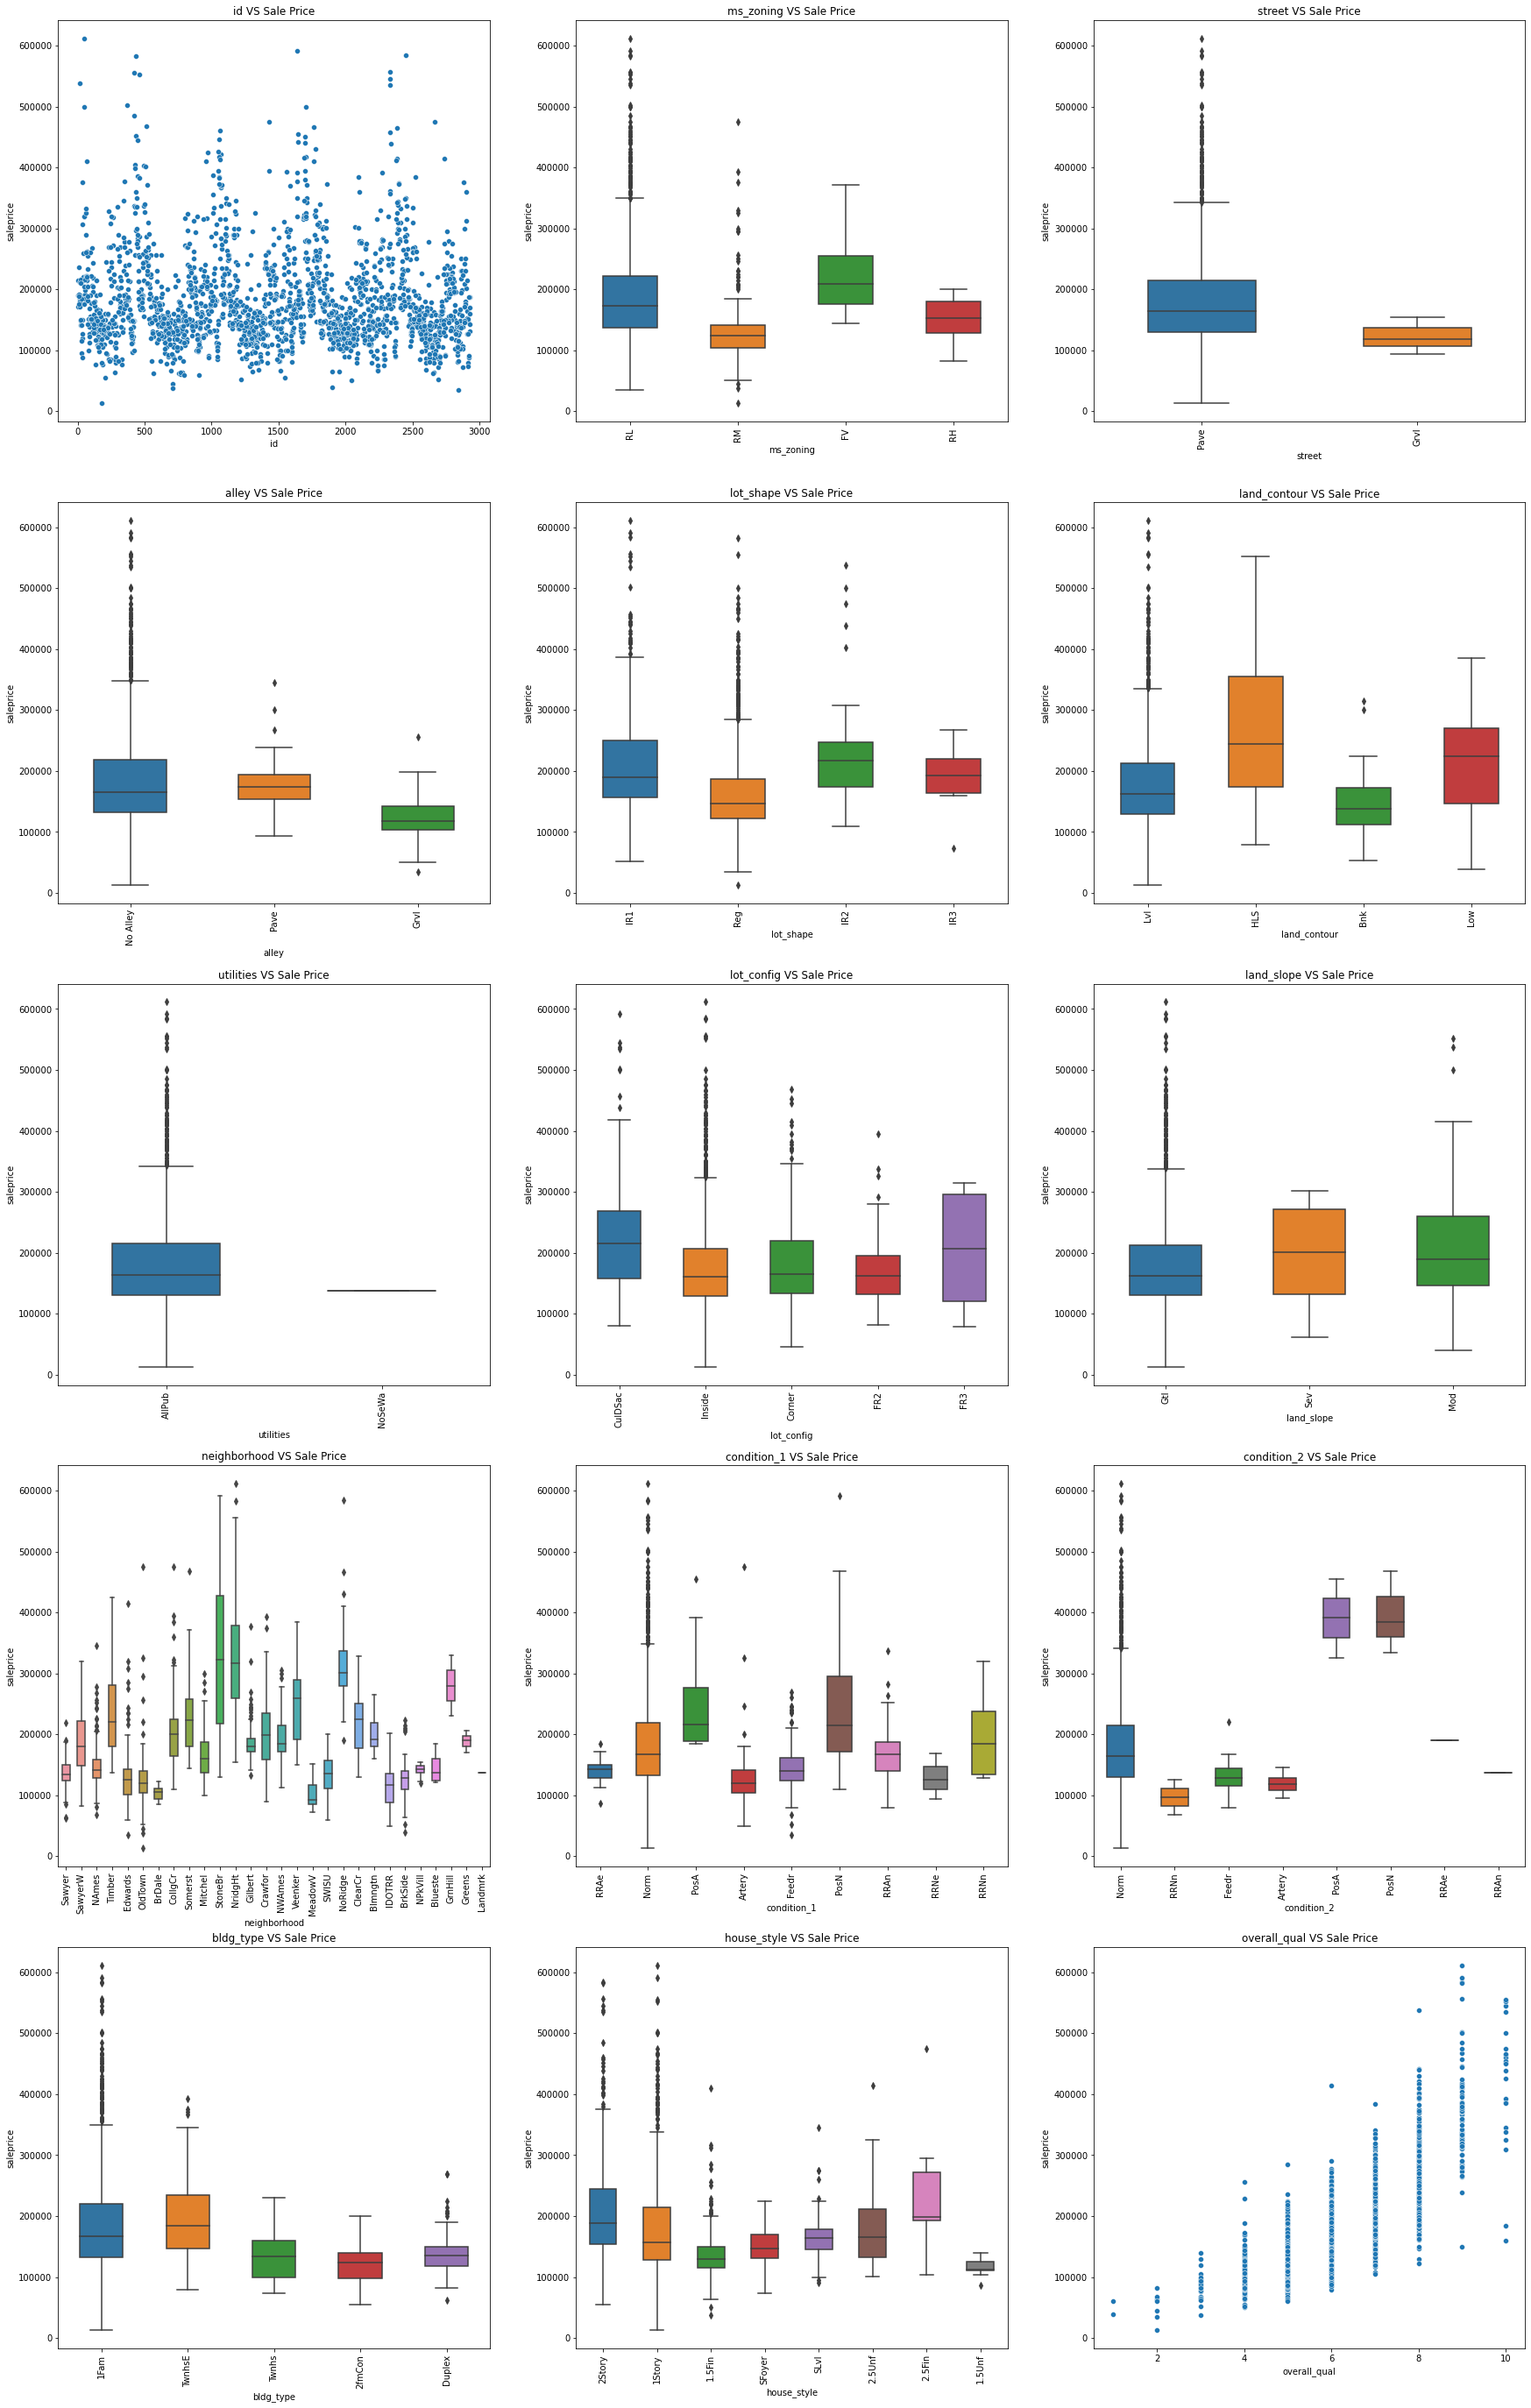

In [695]:
#Plotting scatter and boxplot to see the correlation between features and sales price
col_0to14 = housing_data.columns[0:15]
subplot(housing_data, col_0to14, 15,3)

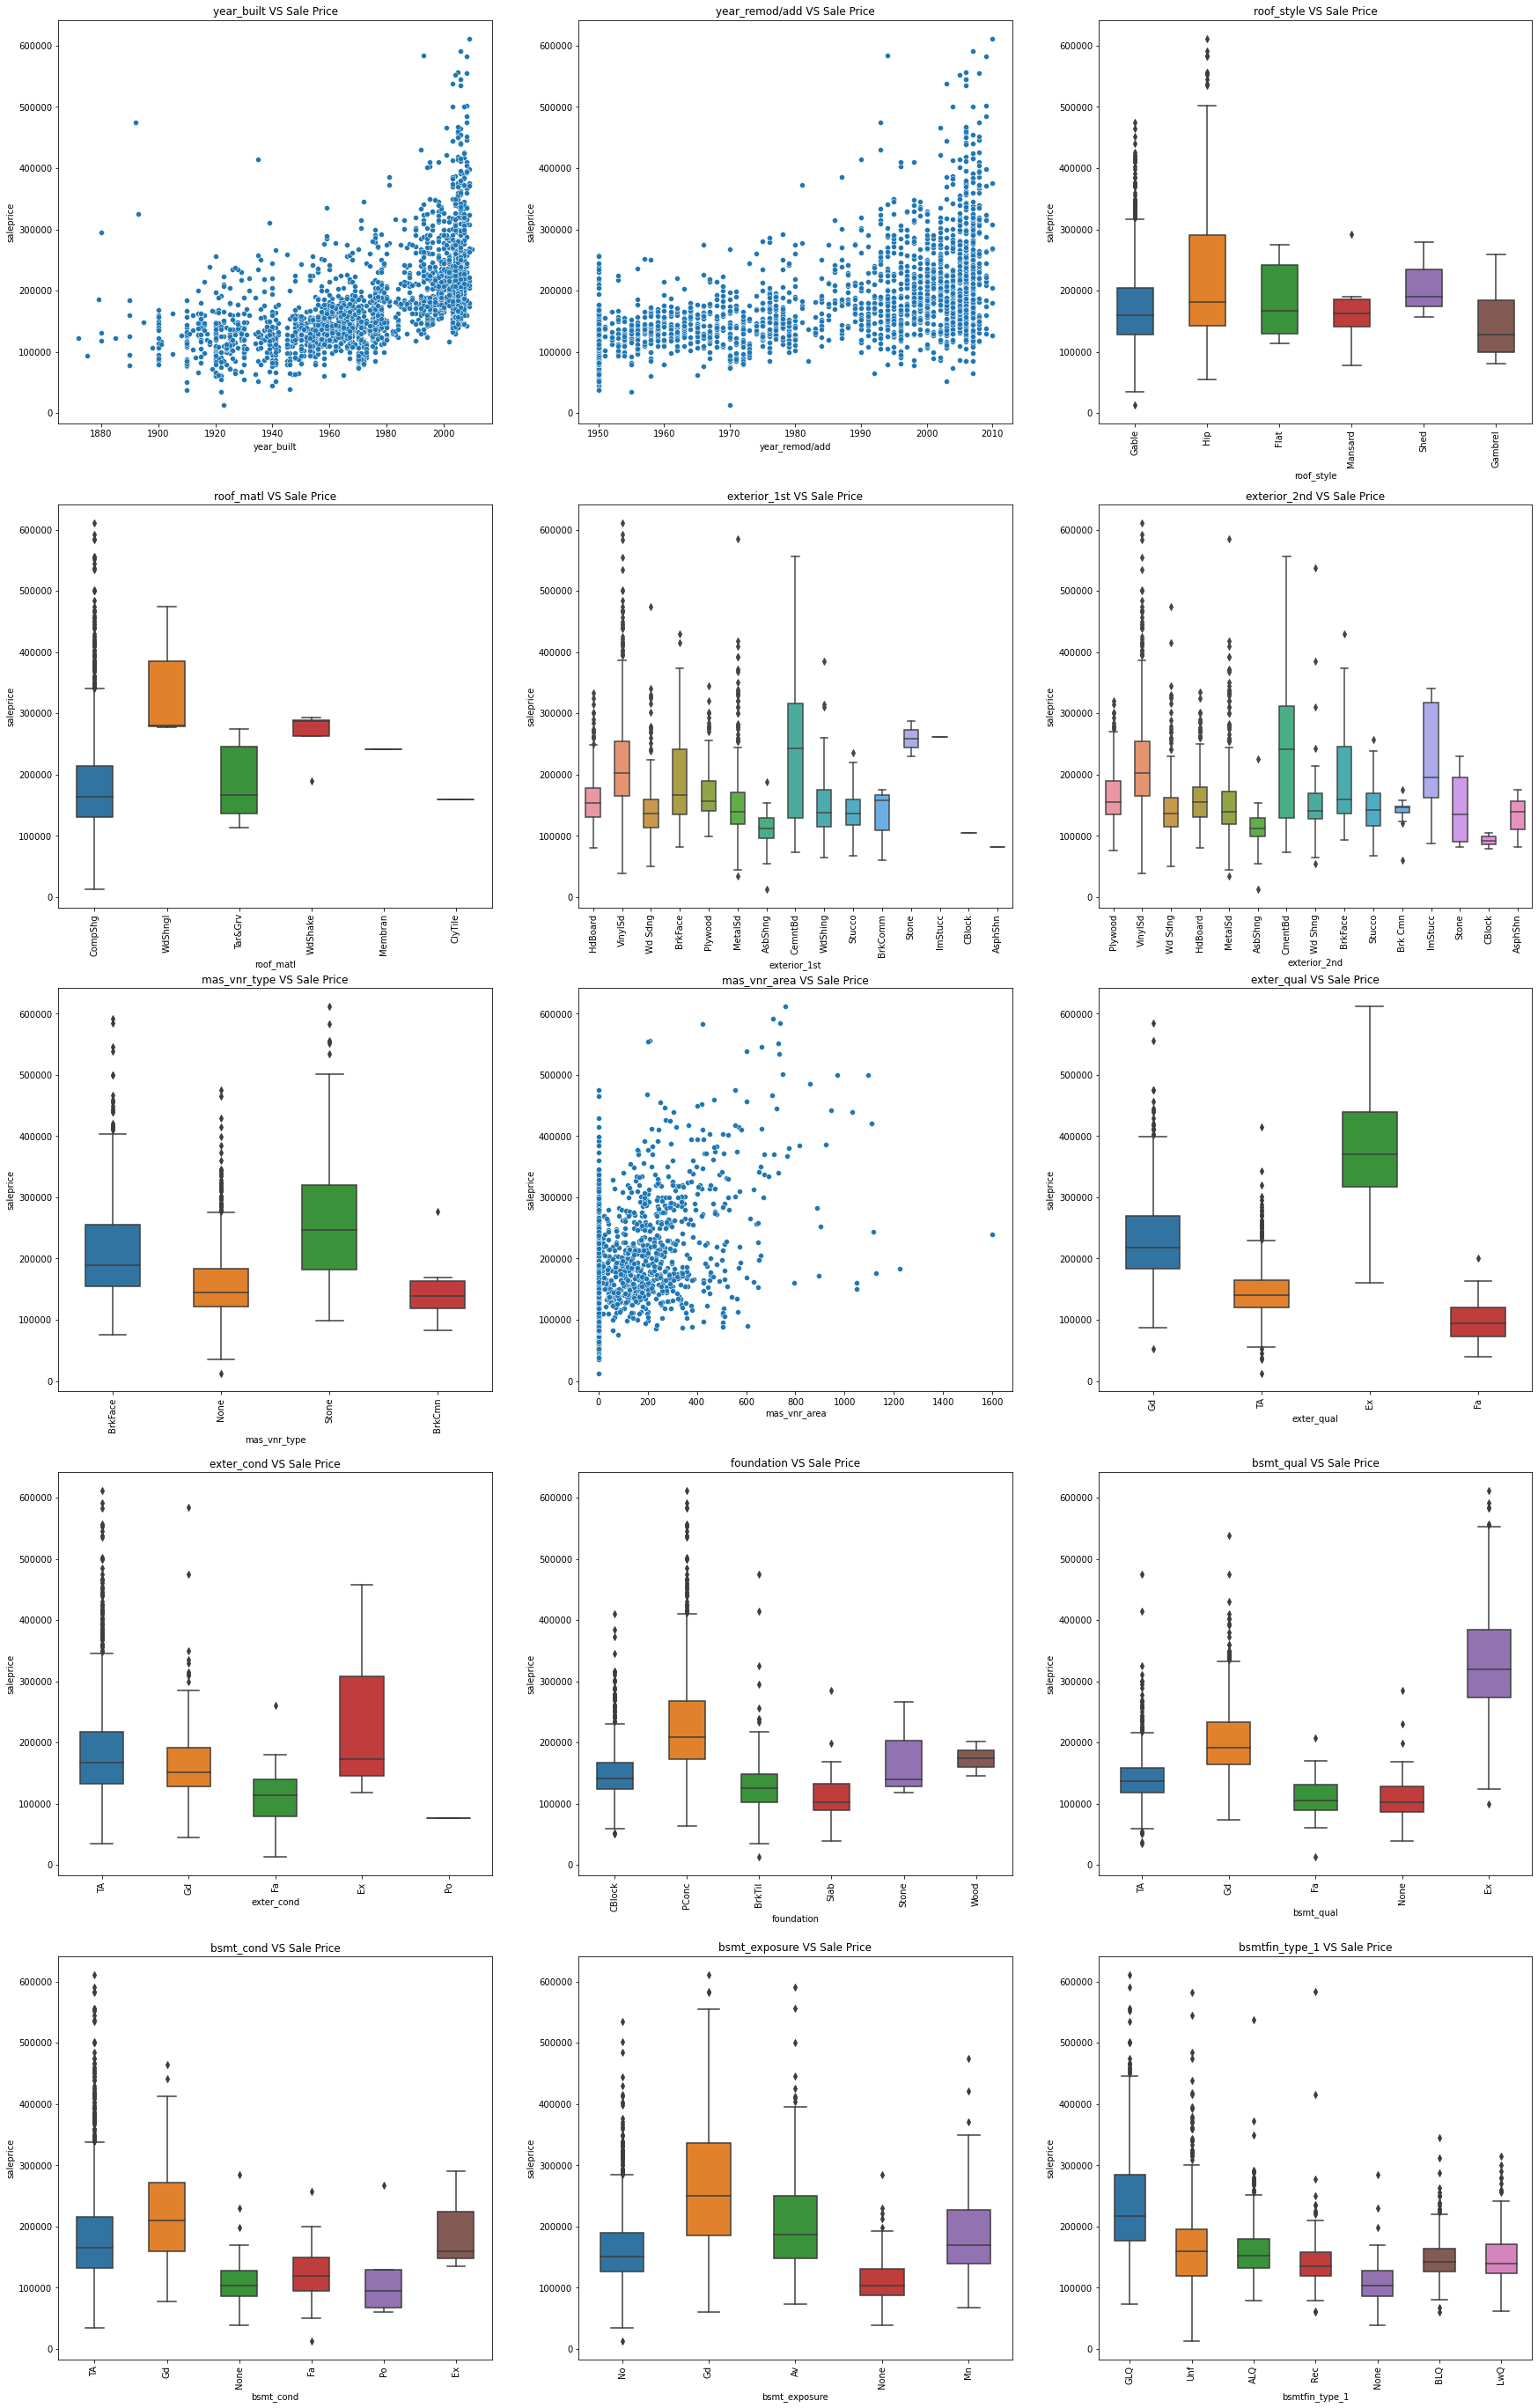

In [696]:
col_15to29 = housing_data.columns[15:30]
subplot(housing_data, col_15to29, 15,3)

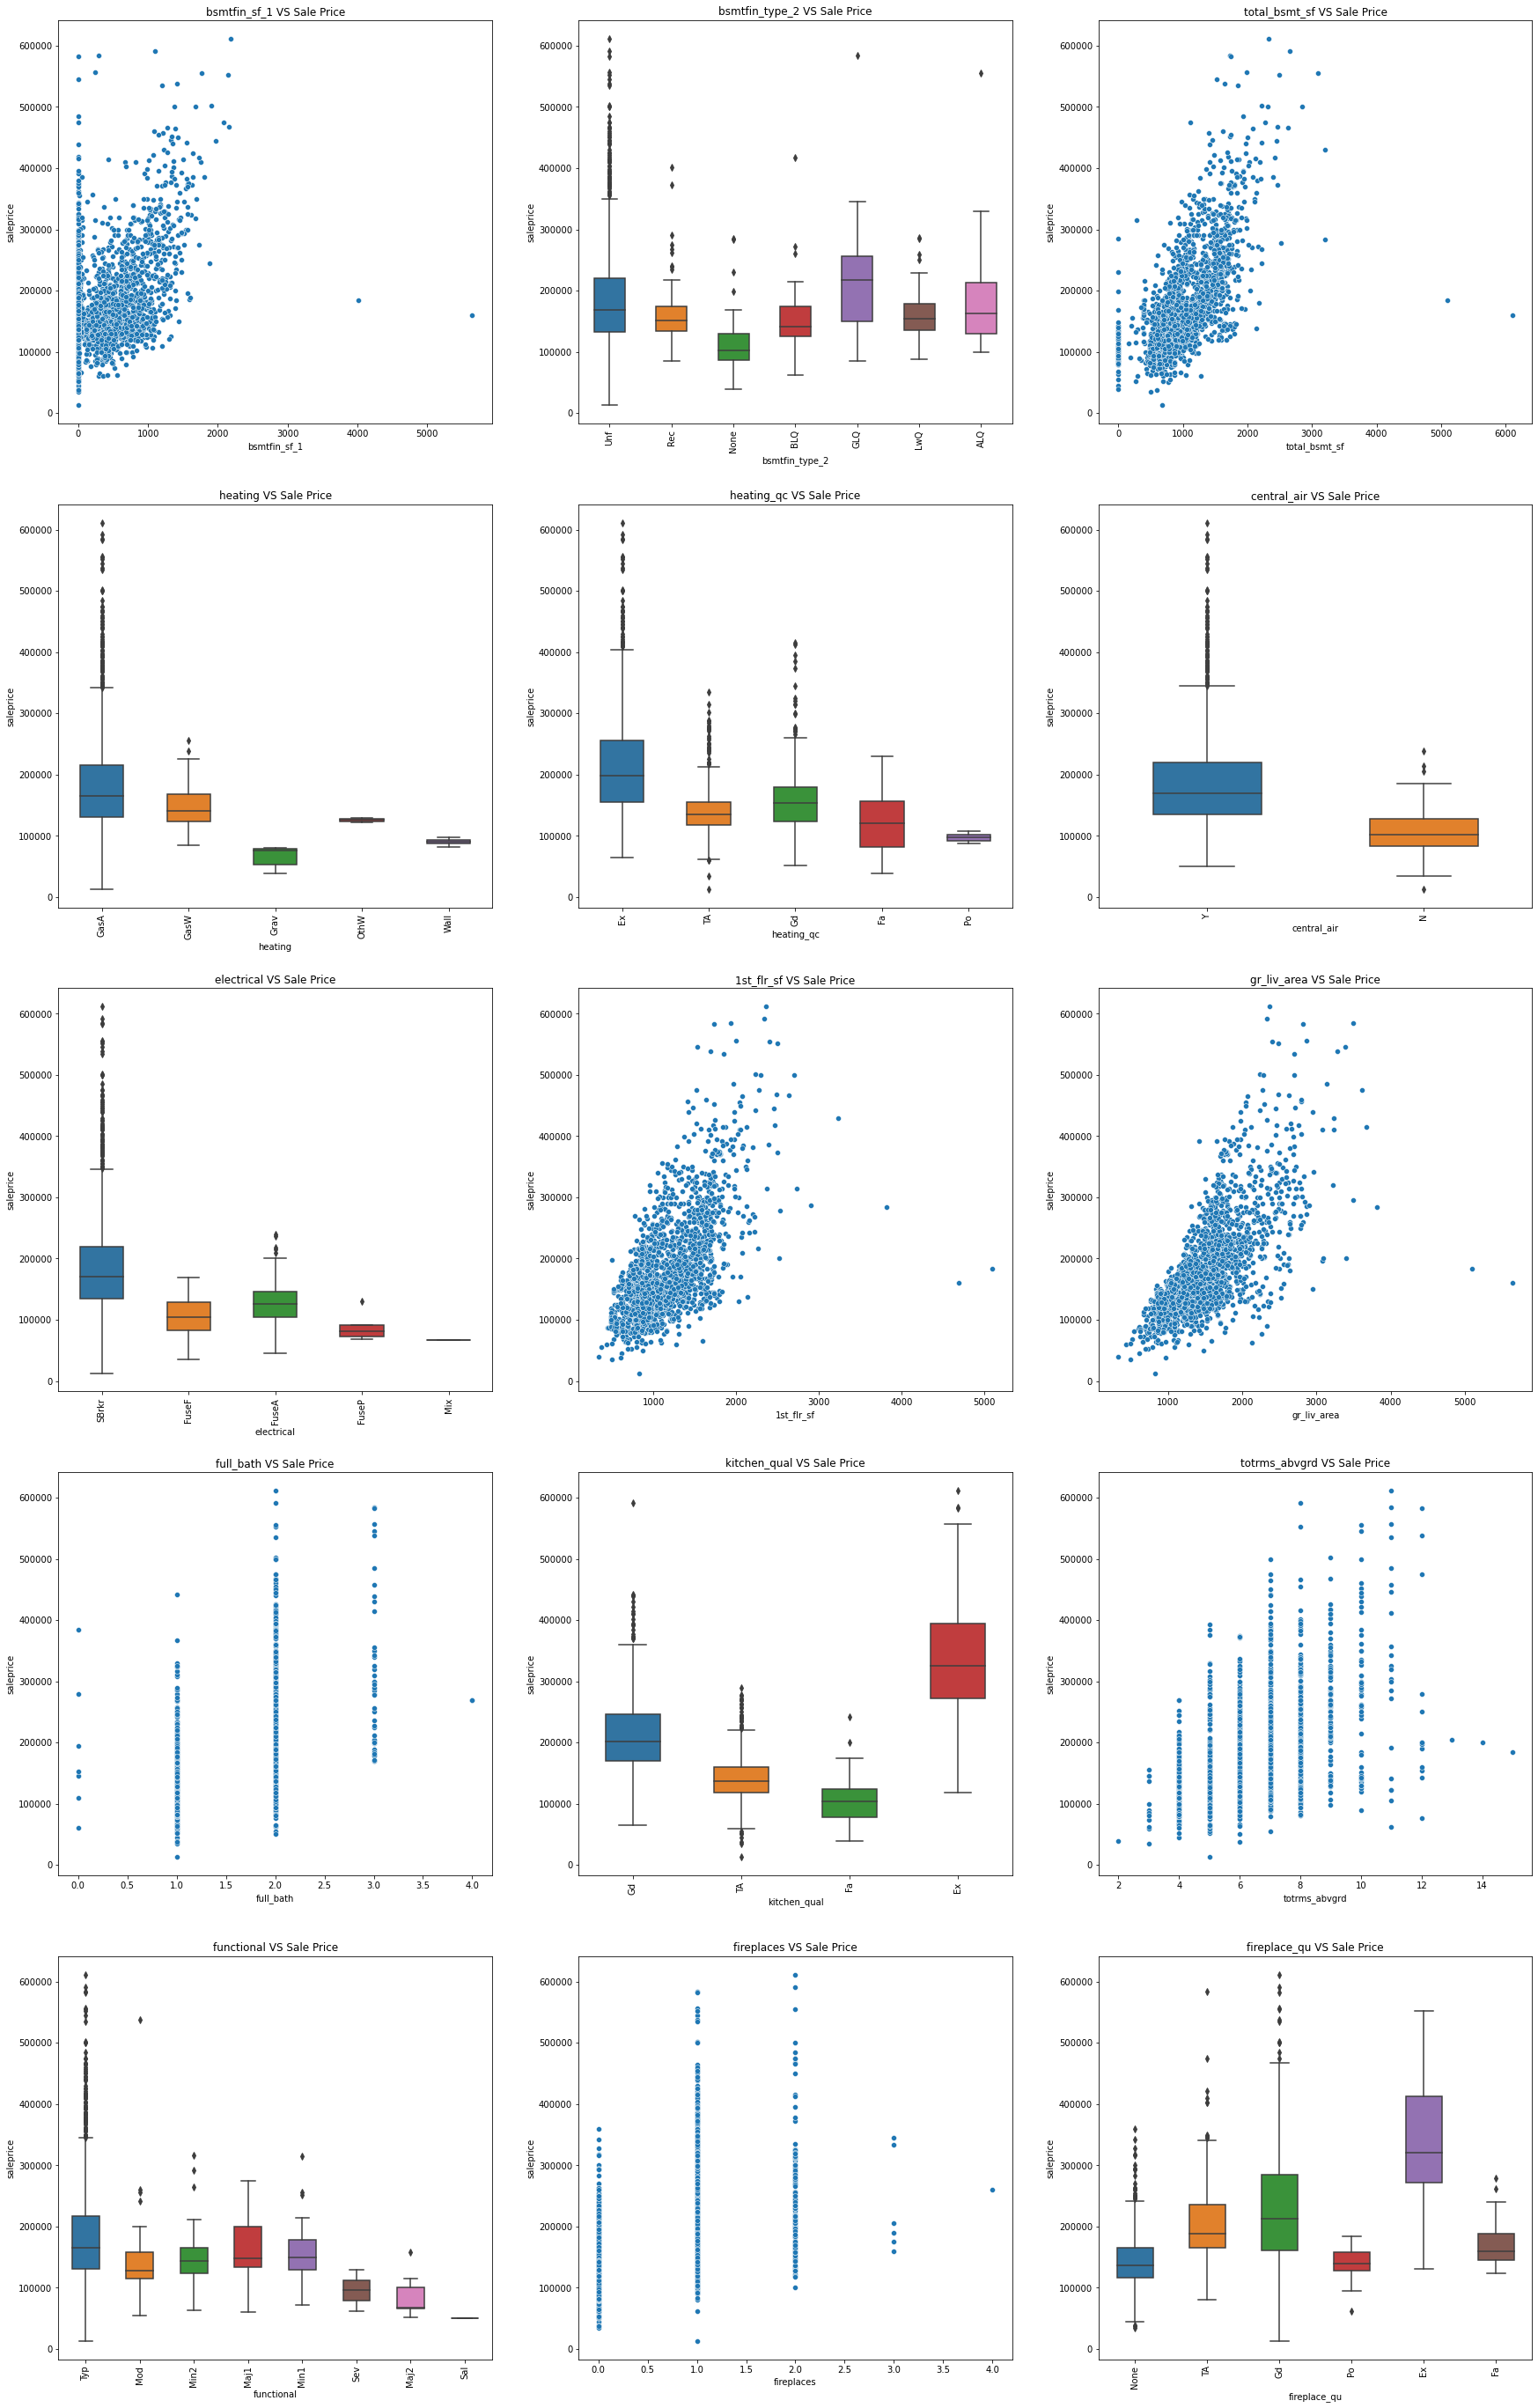

In [697]:
col_30to44 =housing_data.columns[30:45]
subplot(housing_data, col_30to44, 15,3)

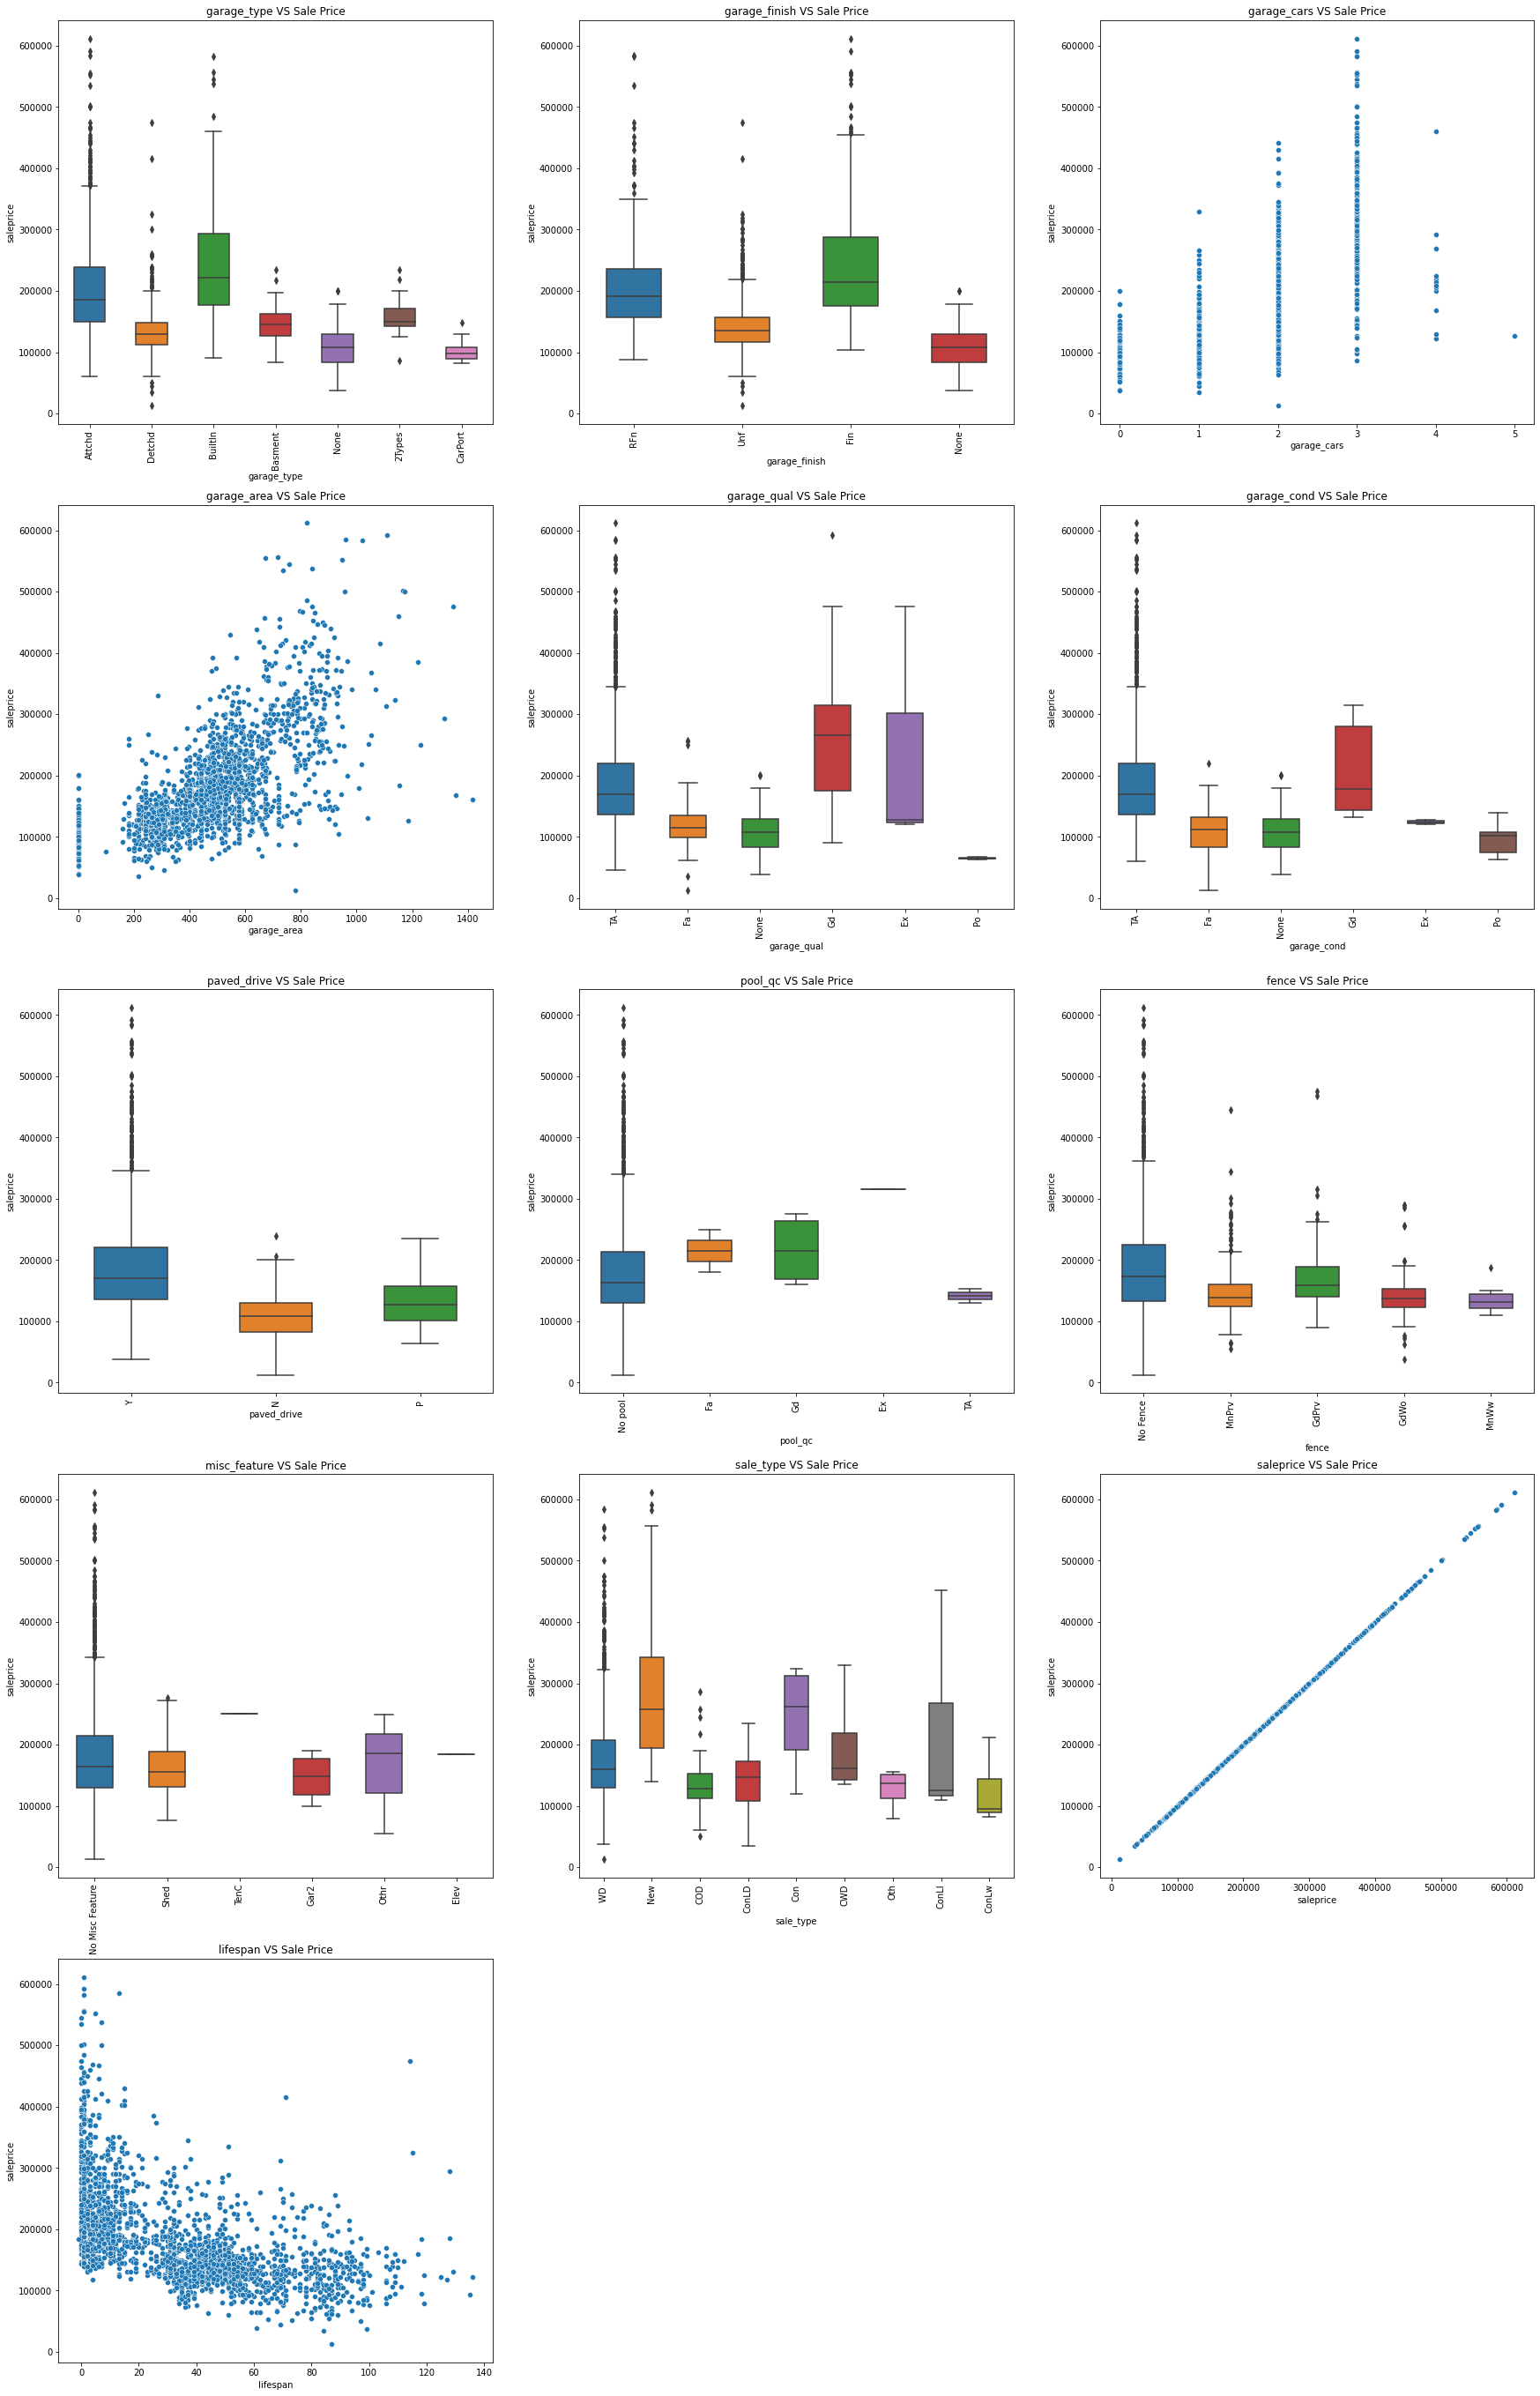

In [698]:
col_45to59 =housing_data.columns[45:60]
subplot(housing_data, col_45to59, 15,3)

So basically for the subplots displayed, to ensure all the plots are displayed, I seperated each segment by 14 plots. For numeric data, it will be displayed on the scatter while categorical data will be displayed on boxplot. For categorical data, I will look at the boxplots of each respective charts to see if there is a uptrend in each of the different types/candle. For example, looking at exter_qual VS sales price (col_15to29, 3rd row, middle chart), we can see that each boxplot has overlapping range but none of the range covers the other boxplot. This indicates that each category would generally lead to different sale price in their respective ranking. (Highest price range for excellent condition). For scatter plot, we can easily identify the trend visually. For example, lifespan vs saleprice(col_45to59, last row, third chart) clearly display a gradual downwards trend. This indicates that as the lifespan of the property grows, the sales prices will gradually decrease over the years. 

In [699]:
#Determine ordinal and non-ordinal types for >40% corr with sales price 
print(housing_data['mas_vnr_type'].value_counts())
print(housing_data['exter_qual'].value_counts())
print(housing_data['foundation'].value_counts())
print(housing_data['kitchen_qual'].value_counts())

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64
TA    1233
Gd     696
Ex      81
Fa      19
Name: exter_qual, dtype: int64
PConc     925
CBlock    850
BrkTil    217
Slab       32
Stone       3
Wood        2
Name: foundation, dtype: int64
TA    1030
Gd     805
Ex     151
Fa      43
Name: kitchen_qual, dtype: int64


In [700]:
housing_data['exter_qual'] = housing_data['exter_qual'].map({'Fa': 0, 
                                                             'TA': 1,
                                                             'Gd': 2,
                                                             'Ex': 3})

housing_data['kitchen_qual'] = housing_data['kitchen_qual'].map({'Fa': 0,
                                                                 'TA': 1,
                                                                 'Gd': 2,
                                                                 'Ex': 3})


In [701]:
#Creating dummies variables for for non-ordinal features while at the same time dropping foudation and mas vnr type features
housing_data = pd.get_dummies(data = housing_data, columns=['foundation','mas_vnr_type'])
housing_data.head()




,id,ms_zoning,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,...,gr_liv_area,full_bath,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type,saleprice,lifespan,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone
0,109,RL,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,1976,2005,Gable,CompShg,HdBoard,Plywood,289.0,2,TA,TA,TA,No,GLQ,533.0,Unf,...,1479,2,2,6,Typ,0,None,Attchd,RFn,2.0,475.0,TA,TA,Y,No pool,No Fence,No Misc Feature,WD,130500,34,0,1,0,0,0,0,0,1,0,0
1,544,RL,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,1996,1997,Gable,CompShg,VinylSd,VinylSd,132.0,2,TA,Gd,TA,No,GLQ,637.0,Unf,...,2122,2,2,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,No pool,No Fence,No Misc Feature,WD,220000,13,0,0,1,0,0,0,0,1,0,0
2,153,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,1953,2007,Gable,CompShg,VinylSd,VinylSd,0.0,1,Gd,TA,TA,No,GLQ,731.0,Unf,...,1057,1,2,5,Typ,0,None,Detchd,Unf,1.0,246.0,TA,TA,Y,No pool,No Fence,No Misc Feature,WD,109000,57,0,1,0,0,0,0,0,0,1,0
3,318,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,0.0,1,TA,Gd,TA,No,Unf,0.0,Unf,...,1444,2,1,7,Typ,0,None,BuiltIn,Fin,2.0,400.0,TA,TA,Y,No pool,No Fence,No Misc Feature,WD,174000,4,0,0,1,0,0,0,0,0,1,0
4,255,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,1900,1993,Gable,CompShg,Wd Sdng,Plywood,0.0,1,TA,Fa,Gd,No,Unf,0.0,Unf,...,1445,2,1,6,Typ,0,None,Detchd,Unf,2.0,484.0,TA,TA,N,No pool,No Fence,No Misc Feature,WD,138500,110,0,0,1,0,0,0,0,0,1,0


In [702]:
#Mapping for ordinal columns for test dataset
testHousing_data['exter_qual'] = testHousing_data['exter_qual'].map({'Fa': 0, 
                                                             'TA': 1,
                                                             'Gd': 2,
                                                             'Ex': 3})

testHousing_data['kitchen_qual'] = testHousing_data['kitchen_qual'].map({'Fa': 0,
                                                                 'TA': 1,
                                                                 'Gd': 2,
                                                                 'Ex': 3,
                                                                 'Po': 4})


In [703]:
#Creating dummies variables for for non-ordinal features while at the same time dropping foudation and mas vnr type features
testHousing_data = pd.get_dummies(data = testHousing_data, columns=['foundation','mas_vnr_type'])
testHousing_data.head()


,id,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,...,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,lifespan,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone
0,2658,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,0.0,1,Fa,Fa,TA,No,...,1,440,Po,Po,Y,0,60,112,0,0,0,No pool,No Fence,No Misc Feature,0,4,2006,WD,96,0,0,0,0,1,0,0,0,0,1,0
1,2718,RL,68.0,9662,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,0.0,1,TA,Gd,TA,No,...,2,580,TA,TA,Y,170,0,0,0,0,0,No pool,No Fence,No Misc Feature,0,8,2006,WD,29,0,1,0,0,0,0,0,0,0,1,0
2,2414,RL,58.0,17104,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,0.0,2,TA,Gd,Gd,Av,...,2,426,TA,TA,Y,100,24,0,0,0,0,No pool,No Fence,No Misc Feature,0,9,2006,New,0,0,0,1,0,0,0,0,0,0,1,0
3,1989,RM,60.0,8520,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,0.0,2,TA,TA,TA,No,...,2,480,Fa,TA,N,0,0,184,0,0,0,No pool,No Fence,No Misc Feature,0,7,2007,WD,84,0,1,0,0,0,0,0,0,0,1,0
4,625,RL,68.0,9500,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,247.0,1,TA,Gd,TA,No,...,2,514,TA,TA,Y,0,76,0,0,185,0,No pool,No Fence,No Misc Feature,0,7,2009,WD,46,0,1,0,0,0,0,0,1,0,0,0


In [704]:
#Dropping extra columns discovered that contains 869 zeros in testHousing_data
testHousing_data['mas_vnr_type_CBlock'].value_counts()
testHousing_data.drop('mas_vnr_type_CBlock', axis=1, inplace=True)


Out of all the categorical data, i have identified 4 features that have more than 40% correlation with saleprice. For ordinal data, i have mapped the respective features according to ranking. While for non-ordinal data, i have created dummies variable as a single regression equation to represent multiple groups. This would be able to allow me to determine the correlation of each variables against the sales price. I've also detected an extra variable within the 'mas vnr type' where there is a variable called CBlock. To keep the columns between train and test set balanced, i've decided to drop the column. 

In [705]:
#Dropping Categorical Data that is less than 40% correlated to SalePrice
housing_data.drop(['garage_finish',
                   'bsmt_qual',
                   'fireplace_qu',
                   'ms_zoning',
                   'street',
                   'alley',
                   'lot_shape',
                   'land_contour',
                   'utilities',
                   'lot_config',
                   'land_slope',
                   'neighborhood',
                   'bldg_type',
                   'condition_1',
                   'condition_2',
                   'house_style',
                   'roof_style',
                   'roof_matl',
                   'exterior_1st',
                   'exterior_2nd',
                   'exter_cond',
                   'bsmt_cond',
                   'bsmt_exposure',
                   'bsmtfin_type_1',
                   'bsmtfin_type_2',
                   'heating',
                   'heating_qc',
                   'central_air',
                   'electrical',
                   'functional',
                   'garage_type',
                   'garage_qual',
                   'garage_cond',
                   'paved_drive',
                   'pool_qc',
                   'fence',
                   'misc_feature',
                   'sale_type'], axis =1, inplace = True)


In [706]:
#Dropping respective columns in test dataset 
testHousing_data.drop(['open_porch_sf',
                   'wood_deck_sf',
                   'lot_frontage',
                   'lot_area',
                   'bsmt_full_bath',
                   'half_bath',
                   'garage_yr_blt',
                   '2nd_flr_sf',
                   'bsmt_unf_sf',
                   'bedroom_abvgr',
                   'screen_porch',
                   '3ssn_porch',
                   'mo_sold',
                   'pool_area',
                   'bsmtfin_sf_2',
                   'misc_val',
                   'yr_sold',
                   'kitchen_abvgr',
                   'enclosed_porch',
                   'low_qual_fin_sf',
                   'bsmt_half_bath',
                   'overall_cond','garage_finish',
                   'bsmt_qual',
                   'fireplace_qu',
                   'ms_zoning',
                   'street',
                   'alley',
                   'lot_shape',
                   'land_contour',
                   'utilities',
                   'lot_config',
                   'land_slope',
                   'neighborhood',
                   'bldg_type',
                   'condition_1',
                   'condition_2',
                   'house_style',
                   'roof_style',
                   'roof_matl',
                   'exterior_1st',
                   'exterior_2nd',
                   'exter_cond',
                   'bsmt_cond',
                   'bsmt_exposure',
                   'bsmtfin_type_1',
                   'bsmtfin_type_2',
                   'heating',
                   'heating_qc',
                   'central_air',
                   'electrical',
                   'functional',
                   'garage_type',
                   'garage_qual',
                   'garage_cond',
                   'paved_drive',
                   'pool_qc',
                   'fence',
                   'misc_feature',
                   'sale_type'], axis =1, inplace =True)

After mapping and creating dummies for the selected features, i've deleted the rest of the features to reduce the dataset as i want to focus on high correlation (>40%) with saleprice for my modelling. 

## Data Visualization

In [707]:
#Creating a simplier visual without dummies
simp_heatmap = housing_data[['overall_qual', 
                             'year_built',
                           'year_remod/add', 
                           'mas_vnr_area',
                           'exter_qual', 
                           'bsmtfin_sf_1', 
                           'total_bsmt_sf', 
                           '1st_flr_sf',
                           'gr_liv_area', 
                           'full_bath', 
                           'kitchen_qual', 
                           'totrms_abvgrd',
                           'fireplaces', 
                           'garage_cars', 
                           'garage_area', 
                           'saleprice', 
                           'lifespan',]]
simp_heatmap.head()

,overall_qual,year_built,year_remod/add,mas_vnr_area,exter_qual,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,kitchen_qual,totrms_abvgrd,fireplaces,garage_cars,garage_area,saleprice,lifespan
0,6,1976,2005,289.0,2,533.0,725.0,725,1479,2,2,6,0,2.0,475.0,130500,34
1,7,1996,1997,132.0,2,637.0,913.0,913,2122,2,2,8,1,2.0,559.0,220000,13
2,5,1953,2007,0.0,1,731.0,1057.0,1057,1057,1,2,5,0,1.0,246.0,109000,57
3,5,2006,2007,0.0,1,0.0,384.0,744,1444,2,1,7,0,2.0,400.0,174000,4
4,6,1900,1993,0.0,1,0.0,676.0,831,1445,2,1,6,0,2.0,484.0,138500,110


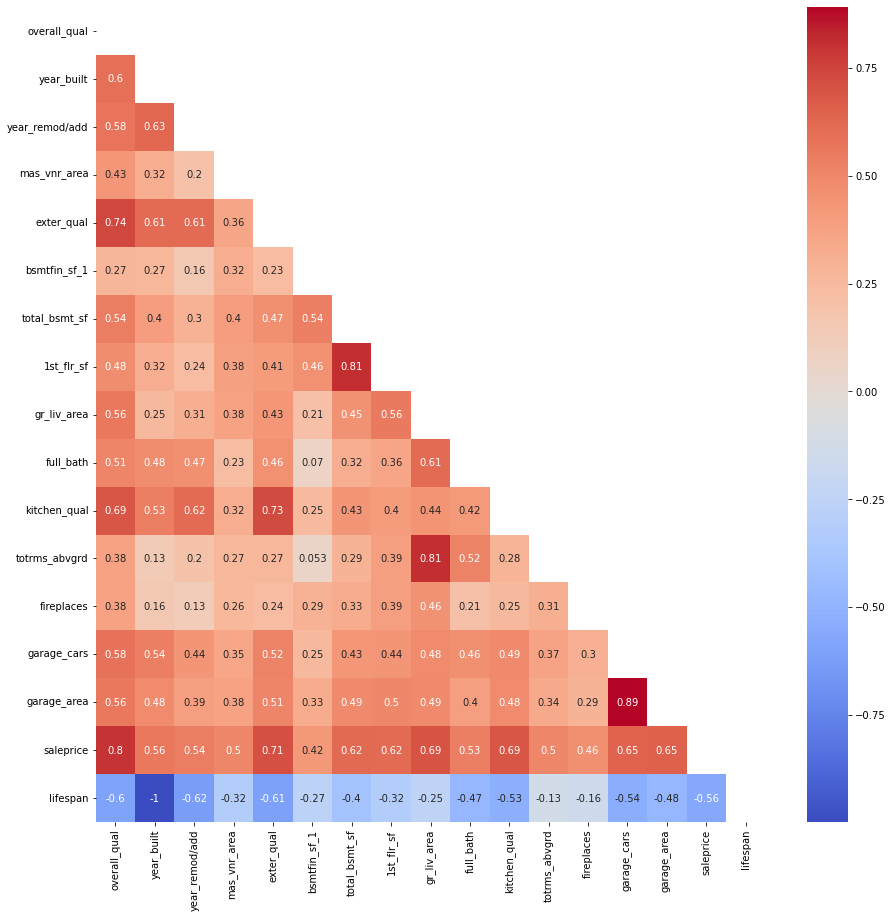

In [708]:
#Correlation heatmap for housing dataframe
mask = np.zeros_like(simp_heatmap.corr())

mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,15))
sns.heatmap(simp_heatmap.corr(), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [709]:
testHousing_data['kitchen_qual'].isnull().sum()

0

**Observations** 

Based on the heatmap above, here are some of my findings: 
1. To create a visually clear heatmap, i have reduced dummies variable as the indiviudal correlation is not significant.
2. As we look at the correlation between each respective features in relation to SalePrice, we can clearly see that some features generally would lead to higher property price (Correlation above 60%). 
    - Overall Quality: As the overall quality of the property increase, with a correlation of 80% that is the highest among all features, this indicates that most property owner and buyers values the property more based on the quality of the house as compared to other features.  
    - External Quality: The second highest features in terms of correlation to salesprice, this indicates that external quality of the house is important to home buyer/seller. 
    - Ground Living area & Kitchen Quality: The third highest correlation to saleprice is both ground living area and kitchen quality. This indicates that most Home buyer may be willing to pay a higher price for larger ground living area as well as better kitchen quality as they may spent most of their time there. 
    
Overall home seller may want to consider investing in improving the quality of the house overall quality, external quality, kitchen quality as well as increasing ground living area if they wishes to increase their probability of selling the house at a higher price. 



In [710]:
simp_heatmap.corr()['saleprice'].sort_values(ascending=False).head(27)


saleprice         1.000000
overall_qual      0.797463
exter_qual        0.709869
gr_liv_area       0.694956
kitchen_qual      0.689562
garage_area       0.648170
garage_cars       0.645071
total_bsmt_sf     0.624187
1st_flr_sf        0.616066
year_built        0.564011
year_remod/add    0.542437
full_bath         0.532112
mas_vnr_area      0.501607
totrms_abvgrd     0.501333
fireplaces        0.464721
bsmtfin_sf_1      0.419046
lifespan         -0.564073
Name: saleprice, dtype: float64

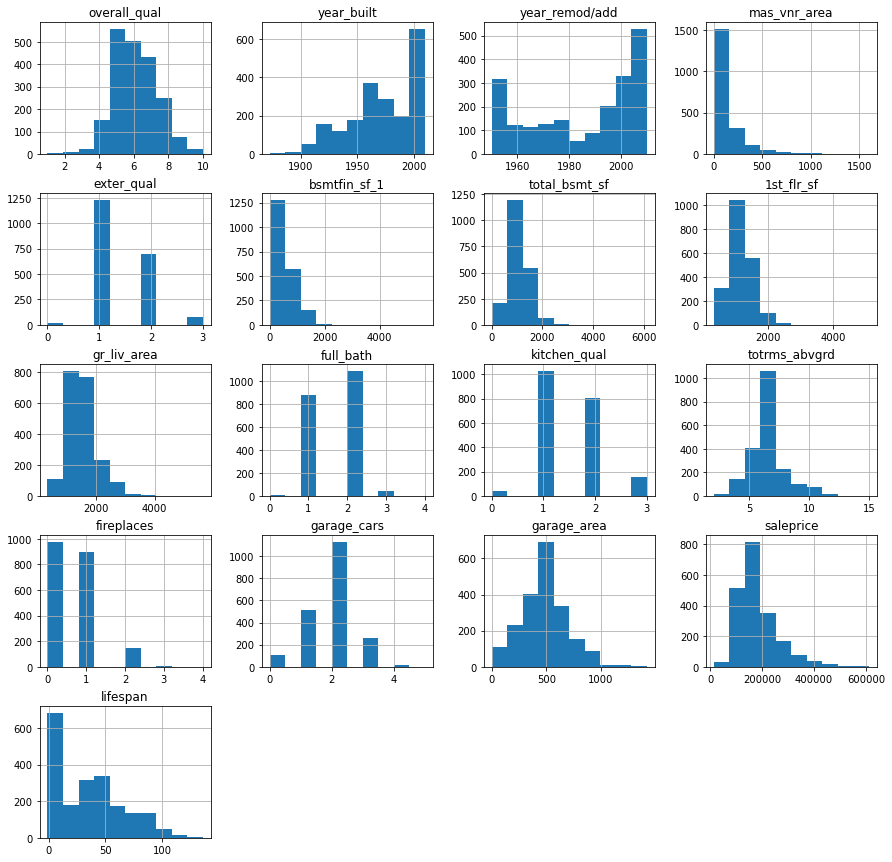

In [711]:
simp_heatmap.hist(figsize =(15,15))
plt.show()

The histogram display is also another visual aid that can allow audience to easily determine what are highest count/measure within each category. For example, in the histogram for year_built, we can clearly identify that there is a huge increase in properties that are built after the year 2000 as compared to 1900 to 1950s. For continuous data, we can also clearly see the distribution of large cluster within a specific range. For example, we can clearly identify that a large amount of properties are sold within the range of \\$150,000 to $200,000. 

### Strength between the strongest correlation and SalePrice

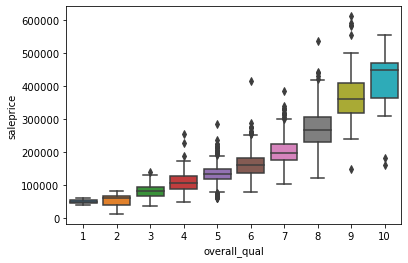

In [712]:
#Boxplot of SalePrice and Overall Qualities
sns.boxplot(x=housing_data['overall_qual'],y=housing_data['saleprice'])
plt.show()

As we can clearly see in the chart above, each box is on a clear uptrend with prices in each respective qualities ranking increasing. This indicates that as the overall quality of the property increase, there is also an increase in saleprices for the property. 

In [713]:
housing_data.shape

(2029, 28)

In [714]:
testHousing_data.shape

(878, 27)

## Export to csv

In [715]:
testHousing_data.shape

(878, 27)

In [716]:
housing_data.isnull().sum()

id                      0
overall_qual            0
year_built              0
year_remod/add          0
mas_vnr_area            0
exter_qual              0
bsmtfin_sf_1            0
total_bsmt_sf           0
1st_flr_sf              0
gr_liv_area             0
full_bath               0
kitchen_qual            0
totrms_abvgrd           0
fireplaces              0
garage_cars             0
garage_area             0
saleprice               0
lifespan                0
foundation_BrkTil       0
foundation_CBlock       0
foundation_PConc        0
foundation_Slab         0
foundation_Stone        0
foundation_Wood         0
mas_vnr_type_BrkCmn     0
mas_vnr_type_BrkFace    0
mas_vnr_type_None       0
mas_vnr_type_Stone      0
dtype: int64

In [717]:
testHousing_data.isnull().sum()

id                      0
overall_qual            0
year_built              0
year_remod/add          0
mas_vnr_area            0
exter_qual              0
bsmtfin_sf_1            0
total_bsmt_sf           0
1st_flr_sf              0
gr_liv_area             0
full_bath               0
kitchen_qual            0
totrms_abvgrd           0
fireplaces              0
garage_cars             0
garage_area             0
lifespan                0
foundation_BrkTil       0
foundation_CBlock       0
foundation_PConc        0
foundation_Slab         0
foundation_Stone        0
foundation_Wood         0
mas_vnr_type_BrkCmn     0
mas_vnr_type_BrkFace    0
mas_vnr_type_None       0
mas_vnr_type_Stone      0
dtype: int64

In [718]:
#Saving housing_data (Train.csv) into csv for modelling 
housing_data.to_csv('housing_data.csv', index=False)

In [719]:
#Saving housing_data (Train.csv) into csv for modelling 
testHousing_data.to_csv('testHousing_data.csv', index=False)

As the combination of train and test file is very lengthy, i've decided to split the notebook and create another modelling notebook for our regression modelling as well as predictions. 